In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06B.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #06-B <br></center></h2>

<h1><center>Matplotlib: 3D plots and Animations<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: 3D line plot



## Part 1.1: Load the data

The trajectory data for the drone is stored in a 4-column table. The columns, in order, are time, x position, y position, and z position. Each row is a sample measurement of the x, y, and z positions of the drone at a particular time. This matrix is stored in a binary file called 'drone_trajectory.npy', which is stored on your current working directory. Load that file into a NumPy array, and call it `traj`. `traj` should have shape equal to `(75,4)`, meaning that there are 75 consecutive samples. 

**Hint**: For binary NumPy files we use [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

In [3]:
traj = np.load('drone_trajectory.npy')

In [4]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Part 1.2: Nicknames

It is helpful to define variable names for the columns of `traj`, as we will use them repeatedly when plotting. This saves typing, increases clarity, and reduces the chances fpr bugs. 

Define variables `x`, `y`, and `z` for the corresponding columns in `traj`.

In [5]:
time = traj[:,0]
x = traj[:,1]
y = traj[:,2]
z = traj[:,3]

In [6]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Part 1.3: Highest point

We want to point out in the plot the highest elevation (z value) reached by the drone. Find the index of this value. Call it `maxind`.

In [7]:
maxind = np.argmax(z)

In [8]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Part 1.4: Plot

We're now ready to make the plot. Here are the specifications:

+ The figure size is `(8,8)`, and has a single axes. 
+ The trajectory is a solid black line of width 1. The marker is a period `'.'`.
+ Use `ax.scatter` to mark the starting point with a green `'o'` marker of size 80. Label this point as `'start'`.
+ Use `ax.scatter` to mark the point of highest elevation with a red `'o'` marker of size 80.  Label this point as `'highest'`.
+ Add a legend with the start and highest points.

**Try this!**: You can engage an advanced renderer for your plot that allows you to zoom and rotate with your mouse. Do this by adding the ["magic" command](https://ipython.readthedocs.io/en/stable/interactive/magics.html):
```python
%matplotlib widget
```
to the plotting cell. Then run it and drag a point with your mouse.

**Desired result:**

<img src="resources/drone.png" width="400" />

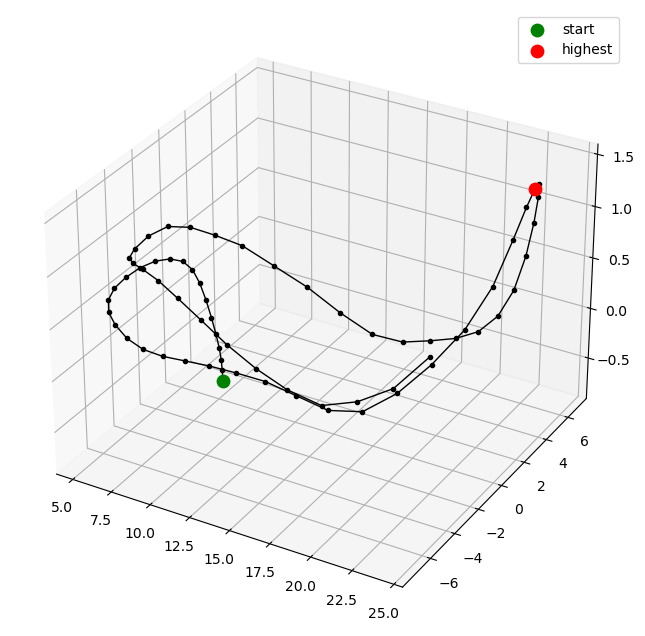

In [9]:
# %matplotlib widget
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(projection = '3d')

ax1.plot(x, y, z, color = 'black', 
          linewidth = 1, marker = '.')

ax1.scatter(x[0],y[0],z[0], color = 'green' , 
            marker = 'o', s = 80, label = 'start')
ax1.scatter(x[maxind], y[maxind],z[maxind], c = 'red', marker = 'o', s = 80, 
            label = 'highest')

ax1.legend()

In [10]:
grader.check("q1p4")

q1p4 results: All test cases passed!

# Question 2: Surface plot on a regular grid

The function $f$ shown below produces a real number for each pair of real numbers $(x,y)$.
$$f(x,y) = \cos(5x)\cos(5y)e^{-0.8(x^2 + y^2)}$$
In this part we will use matplotlib's [`plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) method to visualize $f(x,y)$ on a square patch of points in $xy$. `plot_surface` take 3 inputs: `X`, `Y`, and `Z`, where `X` and `Y` are mesh matrices obtained from NumPy's [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) method. Our first task will be to create the 1D arrays of $x$ and $y$ values required by `meshgrid`.

## Question 2.1: Arrays of x and y values

The grid of points in the $xy$ plane is shown below. To create this, we must first define two 1D arrays with the values of $x$ and $y$. We will call these `xvals` and `yvals`. They should each contain 100 uniformly spaced values ranging from -2 to 2 (inclusive).

<img src="resources/grid.png" width="400" />

**Hint**: [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [11]:
xvals = np.linspace(-2,2,100)
yvals = np.linspace(-2,2,100)

In [12]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: Create the mesh

Use [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to create the 2D grid of points from the 1D arrays of $x$ and $y$ values. Use variables `X` and `Y` for the output of `meshgrid`.  

In [13]:
X, Y = np.meshgrid(xvals, yvals)

In [14]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3: Function evaluation

Evaluate the $f(x,y)$ of the grid. This can be done using NumPy's mathematical functions (such as [`np.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)) on the grid matrices `X` and `Y`. Store the result as `Z`. `Z` should have shape `(100,100)`. 

In [15]:
Z = np.cos(5*X)*np.cos(5*Y)*np.exp(-0.8*(X**2+Y**2))

In [16]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4: Surface plot

Next, create a surface plot of the function using [plot_surface](). The plot should have these characteristics:

+ figsize=(8,8)
+ Set the transparency level (`alpha`) of the surface plot to `0.8`. 
+ Set the colormap (`cmap`) of the surface plot to `'BuPu'`.
+ Set the x-axis label to `'x'` with a font size of 20. 
+ Set the y-axis label to `'y'` with a font size of 20. 
+ Try some of the other available colormaps (provided in lecture). Do you have a favorite?

**Desired result:**

<img src="resources/surf.png" width="400" />

Text(0.5, 0.5, 'y')

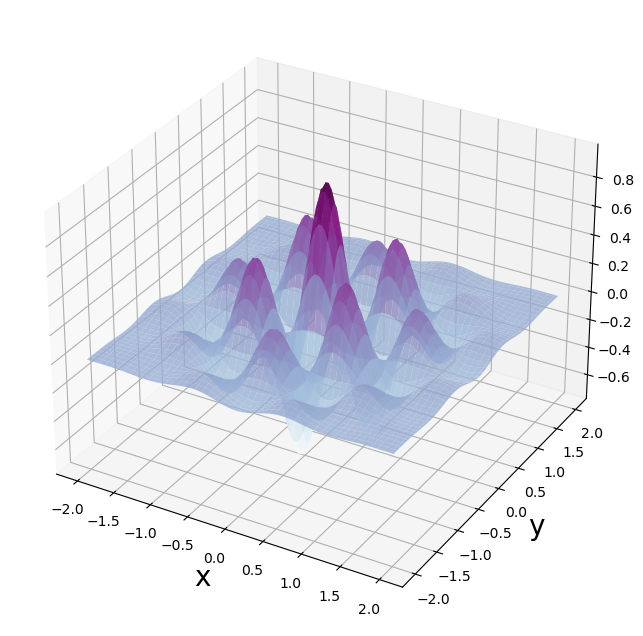

In [17]:
fig2 = plt.figure(figsize= (8,8))
ax2 = fig2.add_subplot(projection = '3d')

ax2.plot_surface(X, Y, Z, alpha = 0.8, cmap = 'BuPu')

ax2.set_xlabel('x', fontsize = 20)
ax2.set_ylabel('y', fontsize = 20)

In [18]:
grader.check("q2p4")

q2p4 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [19]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

q2p4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [21]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)